In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

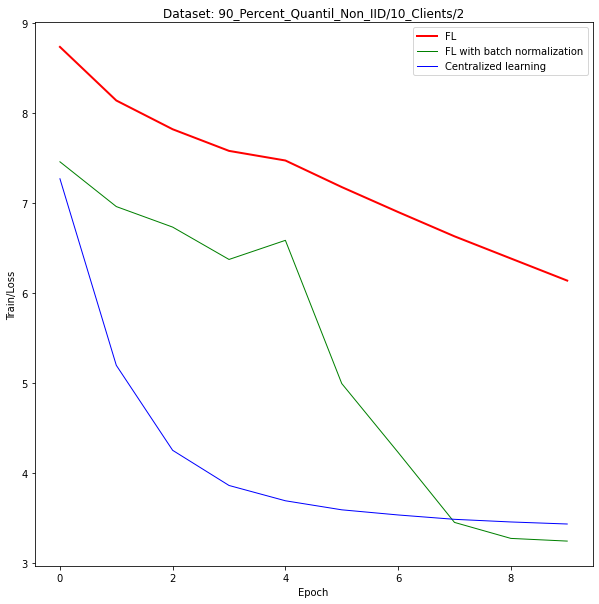

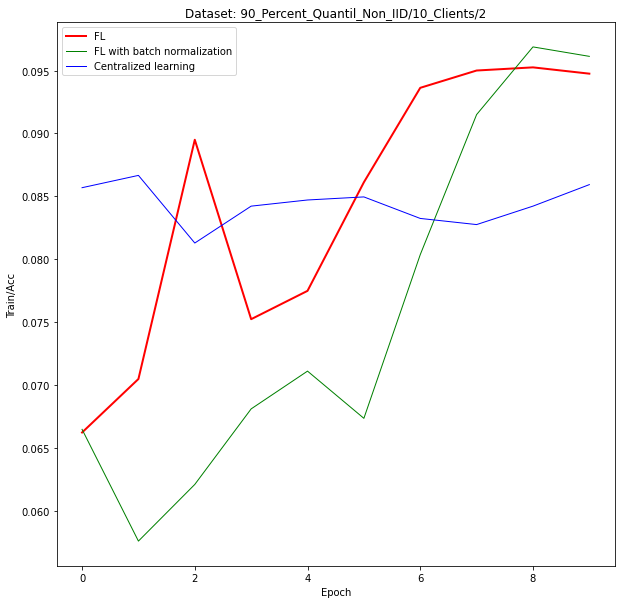

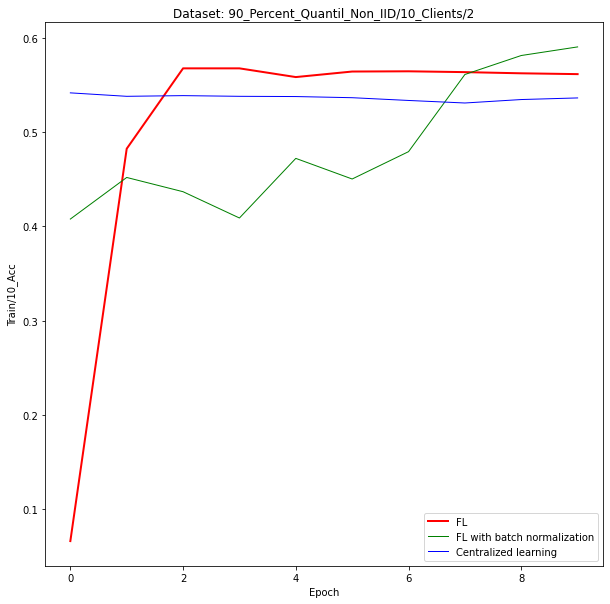

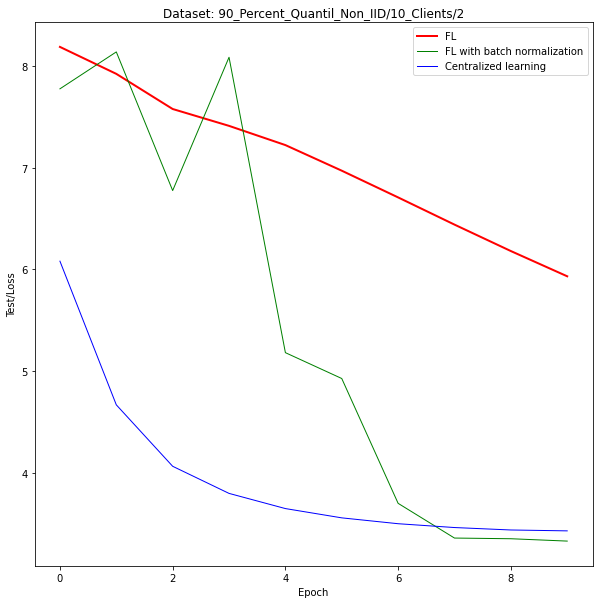

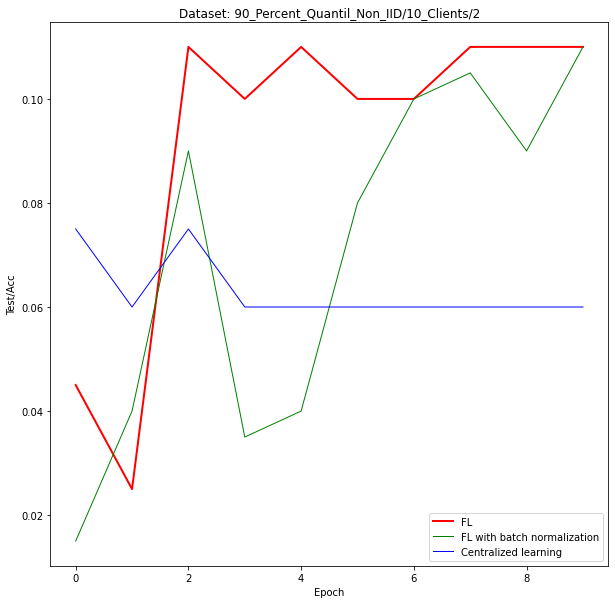

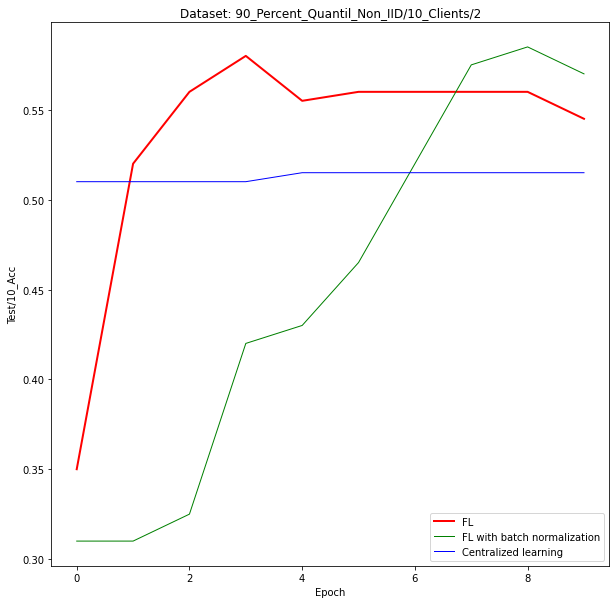

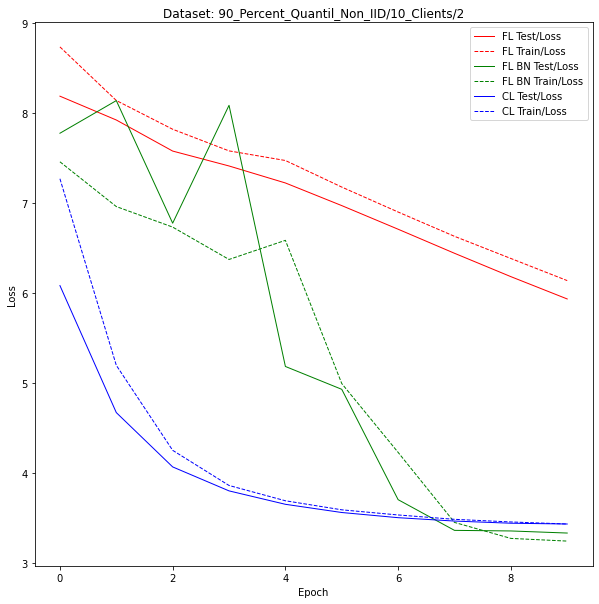

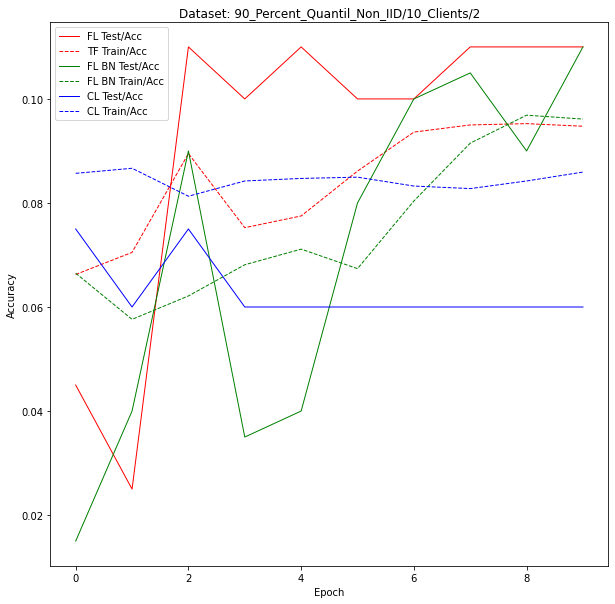

In [17]:
folders = ["20_05_2020/Cosphere", "Infected_Shuffled", "originaler Datensatz/10_Clients", "Infected","random_dist_120_classes_top10", "90_Percent_Quantil_Non_IID/10_Clients"]
for folder in folders: 
    df_federated = pd.read_csv("./out/" + folder + "/federated.csv")
    df_federated_bn = pd.read_csv("./out/" + folder + "/federated_bn.csv")
    df_unfederated = pd.read_csv("./out/" + folder + "/unfederated.csv")

    columns = list(df_federated.columns)
    del columns[0]
    for column in columns:
        for idx, val in enumerate(df_unfederated[column]):
            if type(val) is str:
                val = val.replace(",", ".")
                df_unfederated.loc[idx, column]= float(val)

        for idx, val in enumerate(df_federated[column]):
            if type(val) is str:
                val = val.replace(",", ".")
                df_federated.loc[idx, column]= float(val)

        for idx, val in enumerate(df_federated_bn[column]):
            if type(val) is str:
                val = val.replace(",", ".")
                df_federated_bn.loc[idx, column]= float(val)

    if "Cosphere" in folder:
        title = "Cosphere"
    else:
        title = folder
    for column in columns:
        figure = plt.figure(figsize=(10,10)) 
        
        y_fl = df_federated[column]
        y_fl_bn = df_federated_bn[column]
        y_cl = df_unfederated[column]
        
        lines = plt.plot(
                            df_federated["Epoch"], y_fl, 
                            df_federated_bn["Epoch"], y_fl_bn, 
                            df_unfederated["Epoch"], y_cl
                        )
       
        l_fl, l_fl_bn, l_cl  = lines
        plt.setp(lines, linestyle='-')
        plt.setp(l_fl, linewidth=2, color='r', label="FL")
        plt.setp(l_fl_bn, linewidth=1, color='g', label="FL with batch normalization") 
        plt.setp(l_cl, linewidth=1, color='b', label="Centralized learning")
        plt.legend()
        plt.xlabel("Epoch")
        plt.ylabel(column)
        plt.title(f"Dataset: {title}")
        fig_name = column.replace("/", "_")
        plt.savefig("./out/figures/" + folder + "/" +  fig_name + ".png")
        plt.show()
        
    figure = plt.figure(figsize=(10,10))  
    plt.plot(df_federated["Epoch"], df_federated["Test/Loss"], label = "FL Test/Loss", linewidth=1, color="r" )
    plt.plot(df_federated["Epoch"], df_federated["Train/Loss"],label = "FL Train/Loss", linewidth=1, color = "r", linestyle='--')
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Test/Loss"],label = "FL BN Test/Loss", linewidth=1, color = "g")
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Train/Loss"],label = "FL BN Train/Loss", linewidth=1, color = "g", linestyle='--')
    plt.plot(df_unfederated["Epoch"], df_unfederated["Test/Loss"], label = "CL Test/Loss", linewidth=1, color="b" )
    plt.plot(df_unfederated["Epoch"], df_unfederated["Train/Loss"],label = "CL Train/Loss", linewidth=1, color = "b", linestyle='--')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Dataset: {title}")
    fig_name = column.replace("/", "_")
    plt.savefig("./out/figures/" + folder + "/" +  "Train_Test_Loss" + ".png")
    plt.show()
        
    figure = plt.figure(figsize=(10,10))    
    plt.plot(df_federated["Epoch"], df_federated["Test/Acc"], label = "FL Test/Acc", linewidth=1, color="r" )
    plt.plot(df_federated["Epoch"], df_federated["Train/Acc"],label = "TF Train/Acc", linewidth=1, color = "r", linestyle="--")
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Test/Acc"], label = "FL BN Test/Acc", linewidth=1, color="g" )
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Train/Acc"],label = "FL BN Train/Acc", linewidth=1, color = "g", linestyle="--")
    plt.plot(df_unfederated["Epoch"], df_unfederated["Test/Acc"], label = "CL Test/Acc", linewidth=1, color="b" )
    plt.plot(df_unfederated["Epoch"], df_unfederated["Train/Acc"],label = "CL Train/Acc", linewidth=1, color = "b", linestyle="--")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Dataset: {title}")
    fig_name = column.replace("/", "_")
    plt.savefig("./out/figures/" + folder + "/" +  "Train_Test_Accuracy" + ".png")
    plt.show()

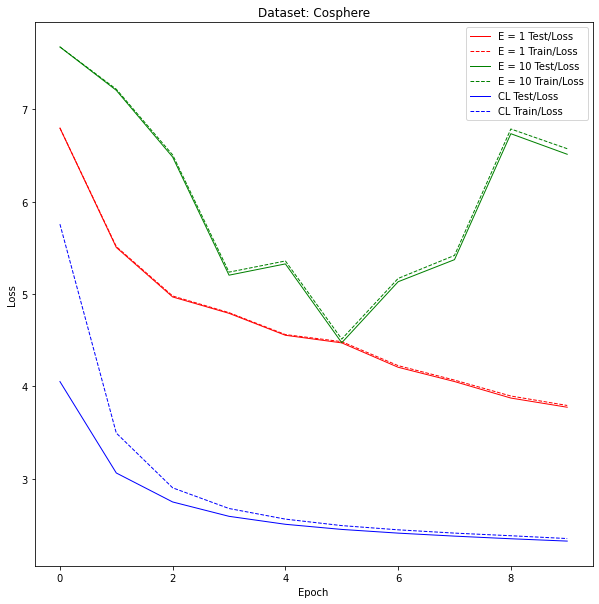

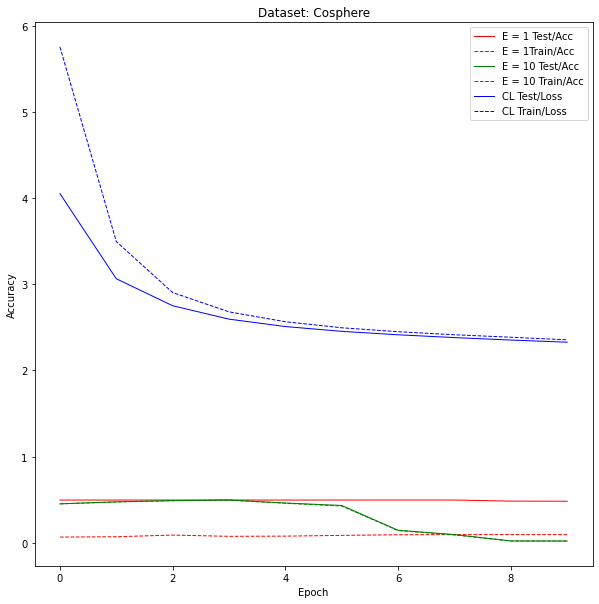

In [13]:
folders = ["20_05_2020/Cosphere"]
for folder in folders: 
    df_federated_bn_1 = pd.read_csv("./out/" + folder + "/federated_bn_1.csv")
    df_federated_bn = pd.read_csv("./out/" + folder + "/federated_bn.csv")
    df_unfederated = pd.read_csv("./out/" + folder + "/unfederated.csv")
    

#     df_unfederated_bn_1 = pd.read_csv("./out/" + folder + "/federated_bn_1.csv")

    columns = list(df_federated.columns)
    del columns[0]
    for column in columns:
        for idx, val in enumerate(df_federated_bn_1[column]):
            if type(val) is str:
                val = val.replace(",", ".")
                df_federated_bn_1.loc[idx, column]= float(val)

        for idx, val in enumerate(df_federated_bn[column]):
            if type(val) is str:
                val = val.replace(",", ".")
                df_federated_bn.loc[idx, column]= float(val)



    figure = plt.figure(figsize=(10,10))  
    plt.plot(df_federated_bn_1["Epoch"], df_federated_bn_1["Test/Loss"], label = "E = 1 Test/Loss", linewidth=1, color="r" )
    plt.plot(df_federated_bn_1["Epoch"], df_federated_bn_1["Train/Loss"],label = "E = 1 Train/Loss", linewidth=1, color = "r", linestyle='--')
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Test/Loss"],label = "E = 10 Test/Loss", linewidth=1, color = "g")
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Train/Loss"],label = "E = 10 Train/Loss", linewidth=1, color = "g", linestyle='--')
    plt.plot(df_unfederated["Epoch"], df_unfederated["Test/Loss"], label = "CL Test/Loss", linewidth=1, color="b" )
    plt.plot(df_unfederated["Epoch"], df_unfederated["Train/Loss"],label = "CL Train/Loss", linewidth=1, color = "b", linestyle='--')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Dataset: Cosphere")
    fig_name = column.replace("/", "_")
    plt.savefig("./out/figures/" + folder + "/" +  "Local_Rounds_Loss" + ".png")
    plt.show()
        
    figure = plt.figure(figsize=(10,10))    
    plt.plot(df_federated_bn_1["Epoch"], df_federated_bn_1["Test/Acc"], label = "E = 1 Test/Acc", linewidth=1, color="r" )
    plt.plot(df_federated["Epoch"], df_federated["Train/Acc"],label = "E = 1Train/Acc", linewidth=1, color = "r", linestyle="--")
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Test/Acc"], label = "E = 10 Test/Acc", linewidth=1, color="g" )
    plt.plot(df_federated_bn["Epoch"], df_federated_bn["Train/Acc"],label = "E = 10 Train/Acc", linewidth=1, color = "g", linestyle="--")
    plt.plot(df_unfederated["Epoch"], df_unfederated["Test/Loss"], label = "CL Test/Loss", linewidth=1, color="b" )
    plt.plot(df_unfederated["Epoch"], df_unfederated["Train/Loss"],label = "CL Train/Loss", linewidth=1, color = "b", linestyle='--')
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Dataset: Cosphere")
    fig_name = column.replace("/", "_")
    plt.savefig("./out/figures/" + folder + "/" +  "Local_Rounds_Accuracy" + ".png")
    plt.show()
